In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()
data=pd.read_csv('LinearRegression.csv')

data1=data[["price","sqft_living"]]
data2=data[["price","bedrooms"]]
data3=data[["price","bathrooms"]]
data4=data[["price","floors"]]

## for price and floors

In [3]:
data4.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0


In [4]:
data4.tail()

,price,floors
21608,360000,3.0
21609,400000,2.0
21610,402101,2.0
21611,400000,2.0
21612,325000,2.0


In [5]:
data4.dtypes

price       int64
floors    float64
dtype: object

In [6]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   21613 non-null  int64  
 1   floors  21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [7]:
data4.describe()

,price,floors
count,2.161300e+04,21613.000000
mean,5.400881e+05,1.494309
std,3.671272e+05,0.539989
min,7.500000e+04,1.000000
25%,3.219500e+05,1.000000
50%,4.500000e+05,1.500000
75%,6.450000e+05,2.000000
max,7.700000e+06,3.500000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C34BD7F288>,
      dtype=object)

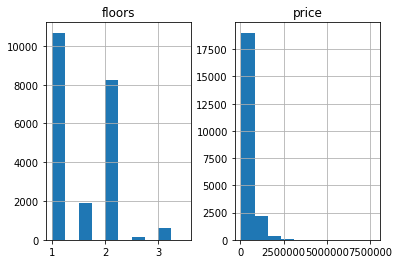

In [8]:
data4.hist()

In [9]:
data4.corr()

,price,floors
price,1.000000,0.256794
floors,0.256794,1.000000


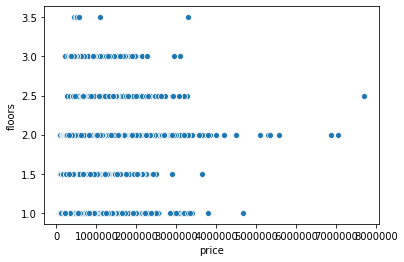

In [10]:
sns.scatterplot(data4['price'],data4['floors'])

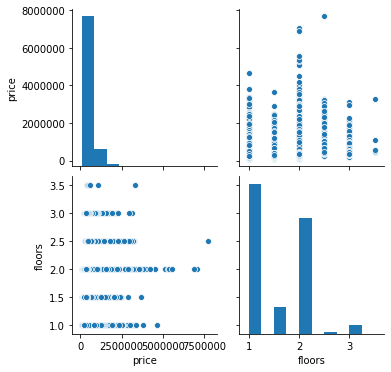

In [17]:
sns.pairplot(data4)

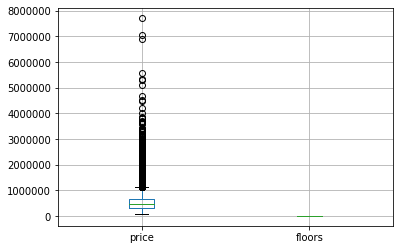

In [18]:
data4.boxplot()

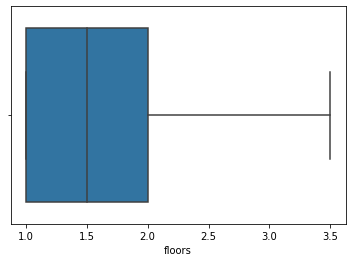

In [19]:
sns.boxplot(data4['floors'])

# Assign the features to X & Y

In [20]:
data4.head(1)

,price,floors
0,221900,1.0


In [21]:
x=data4.iloc[:,:1]

In [22]:
x.head(1)

,price
0,221900


In [23]:
y=data4.iloc[:,1:]

In [24]:
y.head(1)

,floors
0,1.0


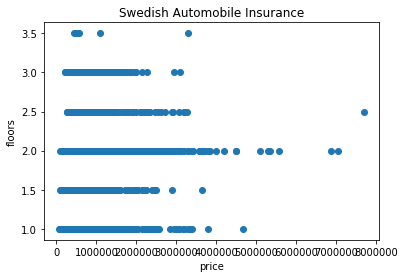

In [25]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Swedish Automobile Insurance')
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

# Split the records for training & testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [28]:
data4.shape

(21613, 2)

In [29]:
X_train.shape

(17290, 1)

In [30]:
X_test.shape

(4323, 1)

In [31]:
y_train.shape

(17290, 1)

In [32]:
y_test.shape

(4323, 1)

# Model Building with sklearn

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


# Train the model

In [34]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lin_reg.coef_

array([[3.73194413e-07]])

In [36]:
lin_reg.intercept_

array([1.29281316])

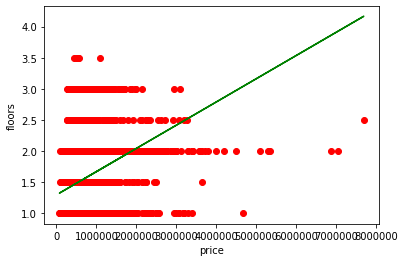

In [37]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('price')
plt.ylabel('floors')
plt.show()


# Test the model

In [38]:
ypred=lin_reg.predict(X_test)
ypred

array([[1.56711105],
       [1.72198673],
       [1.4236178 ],
       ...,
       [1.44113928],
       [1.43276106],
       [1.3704376 ]])

In [39]:
X_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [40]:
data4.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0


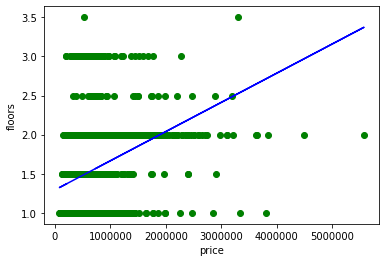

In [41]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('price')
plt.ylabel('floors')
plt.show()


# estimate the cost

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.07374135097127821
The RMSE value is........ 0.5222402255396246


In [43]:
data4.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0


# How to predict for unseen value

In [45]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given price is....',unseen_pred)

The unseen for the given price is.... [[1.29402007]]
